<a href="https://colab.research.google.com/github/E94086254/algorithm/blob/main/%E3%80%8Ccat_dog%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2023-08-09 06:10:44--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   225MB/s    in 0.3s    

2023-08-09 06:10:45 (225 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Unzip zip file**

In [ ]:
import os
import zipfile

# 將下載到的資料集解壓縮至/tmp
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

**Load dataset as a object**

In [ ]:
image_size = (224,224)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/tmp/cats_and_dogs_filtered/train",
    seed=1337,
    image_size=image_size,
    label_mode="binary",
    batch_size=20
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/tmp/cats_and_dogs_filtered/validation",
    seed=1337,
    image_size=image_size,
    label_mode="binary",
    batch_size=20
)
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


image_batch, labels_batch = next(iter(train_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
0.0010948742 1.0


**Show image**

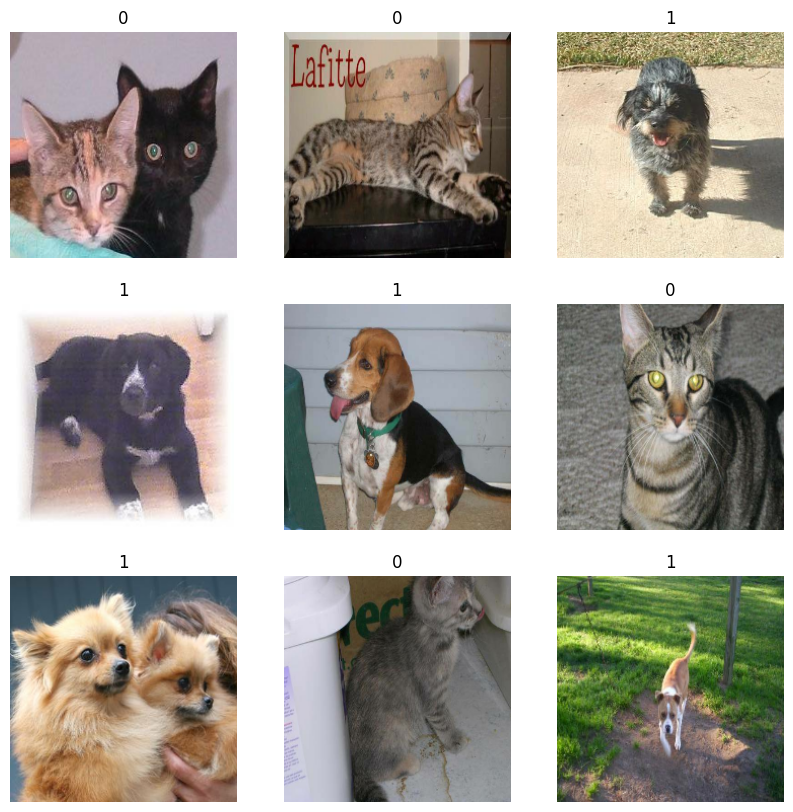

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow((images[i].numpy()*255).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

**ImageDataGenerator**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/tmp/cats_and_dogs_filtered/train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
    '/tmp/cats_and_dogs_filtered/validation',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


**Import some library from tensorflow/keras**

In [ ]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten, Input

In [ ]:
# Acc: 0.7460
def myModel1():
    input_tensor=Input(shape=(224,224,3))

    x = Conv2D(4,(3,3),activation='relu',padding='same')(input_tensor)
    x = MaxPooling2D((4,4),strides=(4,4))(x)

    x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
    x = MaxPooling2D((3,3),strides=(3,3))(x)

    x = Conv2D(16,(3,3),activation='relu',padding='same')(x)
    x = MaxPooling2D((3,3),strides=(3,3))(x)

    x = Flatten()(x)

    x = Dense(6,activation='relu')(x)

    output_tensor = Dense(1,activation='sigmoid')(x)
    model = Model(input_tensor,output_tensor)
    return model

In [ ]:
from tensorflow.python import xla
def myModel2():
    input_tensor=Input(shape=(224,224,3))

    x = Conv2D(4,(3,3),activation='relu',padding='same')(input_tensor)
    x = Conv2D(4,(3,3),activation='relu',padding='same')(x)
    x = MaxPooling2D((4,4),strides=(4,4))(x)

    x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
    x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
    x = MaxPooling2D((3,3),strides=(3,3))(x)

    x = Conv2D(16,(3,3),activation='relu',padding='same')(x)
    x = Conv2D(16,(3,3),activation='relu',padding='same')(x)
    x = MaxPooling2D((3,3),strides=(3,3))(x)

    x = Conv2D(16,(3,3),activation='relu',padding='same')(x)
    x = Conv2D(16,(3,3),activation='relu',padding='same')(x)
    x = MaxPooling2D((3,3),strides=(3,3))(x)

    x = Flatten()(x)
    x = Dense(6,activation='relu')(x)
    output_tensor = Dense(1,activation='sigmoid')(x)
    model = Model(input_tensor,output_tensor)
    return model

**Check model summary**

In [ ]:
model = myModel1()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 4)       112       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 8)         296       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 16)        1168  

**Setting optimizer and loss function**

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])



model_1

In [ ]:
hist = model.fit(train_ds,
      epochs=10,
      batch_size=64,
      validation_data=val_ds,
      verbose=1)

Epoch 1/10
100/100 [==============================] - 23s 75ms/step - loss: 0.6940 - accuracy: 0.4940 - val_loss: 0.6926 - val_accuracy: 0.5140
Epoch 2/10
100/100 [==============================] - 5s 44ms/step - loss: 0.6920 - accuracy: 0.5115 - val_loss: 0.6912 - val_accuracy: 0.5180
Epoch 3/10
100/100 [==============================] - 6s 57ms/step - loss: 0.6901 - accuracy: 0.5145 - val_loss: 0.6895 - val_accuracy: 0.5190
Epoch 4/10
100/100 [==============================] - 5s 44ms/step - loss: 0.6882 - accuracy: 0.5175 - val_loss: 0.6875 - val_accuracy: 0.5190
Epoch 5/10
100/100 [==============================] - 6s 58ms/step - loss: 0.6856 - accuracy: 0.5260 - val_loss: 0.6855 - val_accuracy: 0.5250
Epoch 6/10
100/100 [==============================] - 5s 52ms/step - loss: 0.6825 - accuracy: 0.5490 - val_loss: 0.6830 - val_accuracy: 0.5600
Epoch 7/10
100/100 [==============================] - 6s 57ms/step - loss: 0.6796 - accuracy: 0.5715 - val_loss: 0.6800 - val_accuracy: 0.573

model_2

In [ ]:
model = myModel2()
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_42 (Conv2D)          (None, 224, 224, 4)       112       
                                                                 
 conv2d_43 (Conv2D)          (None, 224, 224, 4)       148       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 56, 56, 4)        0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 56, 56, 8)         296       
                                                                 
 conv2d_45 (Conv2D)          (None, 56, 56, 8)         584       
                                                           

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
hist = model.fit(train_ds,
      epochs=10,
      batch_size=64,
      validation_data=val_ds,
      verbose=1)

Epoch 1/10
100/100 [==============================] - 11s 67ms/step - loss: 0.6930 - accuracy: 0.5030 - val_loss: 0.6926 - val_accuracy: 0.5550
Epoch 2/10
100/100 [==============================] - 6s 60ms/step - loss: 0.6922 - accuracy: 0.5670 - val_loss: 0.6919 - val_accuracy: 0.5190
Epoch 3/10
100/100 [==============================] - 6s 59ms/step - loss: 0.6908 - accuracy: 0.5625 - val_loss: 0.6901 - val_accuracy: 0.5210
Epoch 4/10
100/100 [==============================] - 5s 47ms/step - loss: 0.6872 - accuracy: 0.5905 - val_loss: 0.6863 - val_accuracy: 0.5230
Epoch 5/10
100/100 [==============================] - 6s 58ms/step - loss: 0.6790 - accuracy: 0.5955 - val_loss: 0.6776 - val_accuracy: 0.5580
Epoch 6/10
100/100 [==============================] - 6s 60ms/step - loss: 0.6629 - accuracy: 0.6255 - val_loss: 0.6627 - val_accuracy: 0.6240
Epoch 7/10
100/100 [==============================] - 6s 58ms/step - loss: 0.6440 - accuracy: 0.6430 - val_loss: 0.6558 - val_accuracy: 0.614

ResNet50

In [ ]:
from keras.models.cloning import sequential
import tensorflow as tf
from tensorflow.keras.applications import resnet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
#这里加载ResNet50预训练模型，并且不要全连接层，只选取卷积层的权重参数为自己所用
conv_base = resnet.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())

model.add(layers.Dense(1, activation='sigmoid'))
conv_base.trainable = False	#冻结预训练模型的全部层
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['acc'])

In [ ]:
hist = model.fit(train_ds,
      epochs=10,
      batch_size=64,
      validation_data=val_ds,
      )

Epoch 1/10
100/100 [==============================] - 15s 115ms/step - loss: 0.6952 - acc: 0.4845 - val_loss: 0.6905 - val_acc: 0.5110
Epoch 2/10
100/100 [==============================] - 11s 104ms/step - loss: 0.6891 - acc: 0.5235 - val_loss: 0.6876 - val_acc: 0.5110
Epoch 3/10
100/100 [==============================] - 11s 106ms/step - loss: 0.6862 - acc: 0.5425 - val_loss: 0.6842 - val_acc: 0.5920
Epoch 4/10
100/100 [==============================] - 12s 122ms/step - loss: 0.6826 - acc: 0.5980 - val_loss: 0.6816 - val_acc: 0.5960
Epoch 5/10
100/100 [==============================] - 12s 122ms/step - loss: 0.6797 - acc: 0.6010 - val_loss: 0.6794 - val_acc: 0.6070
Epoch 6/10
100/100 [==============================] - 13s 123ms/step - loss: 0.6778 - acc: 0.6055 - val_loss: 0.6773 - val_acc: 0.6100
Epoch 7/10
100/100 [==============================] - 11s 106ms/step - loss: 0.6753 - acc: 0.6135 - val_loss: 0.6751 - val_acc: 0.6030
Epoch 8/10
100/100 [==============================] - 1

In [ ]:
hist = model.fit(train_generator,
      epochs=10,
      batch_size=64,
      validation_data=validation_generator,
      )

Epoch 1/10
63/63 [==============================] - 39s 538ms/step - loss: 0.7644 - acc: 0.5000 - val_loss: 0.6970 - val_acc: 0.5010
Epoch 2/10
63/63 [==============================] - 34s 533ms/step - loss: 0.6922 - acc: 0.5215 - val_loss: 0.6906 - val_acc: 0.5270
Epoch 3/10
63/63 [==============================] - 32s 517ms/step - loss: 0.6906 - acc: 0.5195 - val_loss: 0.6890 - val_acc: 0.5700
Epoch 4/10
63/63 [==============================] - 32s 511ms/step - loss: 0.6897 - acc: 0.5620 - val_loss: 0.6881 - val_acc: 0.5390
Epoch 5/10
63/63 [==============================] - 34s 539ms/step - loss: 0.6887 - acc: 0.5490 - val_loss: 0.6863 - val_acc: 0.5970
Epoch 6/10
63/63 [==============================] - 35s 549ms/step - loss: 0.6871 - acc: 0.5810 - val_loss: 0.6848 - val_acc: 0.5900
Epoch 7/10
63/63 [==============================] - 35s 555ms/step - loss: 0.6858 - acc: 0.5745 - val_loss: 0.6833 - val_acc: 0.5920
Epoch 8/10
63/63 [==============================] - 33s 519ms/step - 

ResNet18

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from sklearn.metrics import classification_report
import warnings
from keras.layers import Flatten, Dropout
warnings.filterwarnings('ignore')

#模型建立
def conv2d_bn(inpt, filters=64, kernel_size=(3,3), strides=1, padding='same'):
    '''卷积、归一化和relu三合一'''
    x = layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding)(inpt)
    x = layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    return x

def basic_bottle(inpt, filters=64, kernel_size=(3,3), strides=1, padding='same', if_baisc=False):
    '''18中的4个basic_bottle'''
    x = conv2d_bn(inpt, filters=filters, kernel_size=kernel_size, strides=strides, padding=padding)
    x = conv2d_bn(x, filters=filters)
    if if_baisc==True:
        temp = conv2d_bn(inpt, filters=filters, kernel_size=(1,1), strides=2, padding='same')
        outt = layers.add([x, temp])
    else:
        outt = layers.add([x, inpt])
    return outt

def resnet18(class_nums):
    '''主模型'''
    inpt = layers.Input(shape=(224,224,3))
    #layer 1
    x = conv2d_bn(inpt, filters=64, kernel_size=(7,7), strides=2, padding='valid')
    x = layers.MaxPool2D(pool_size=(3,3), strides=2)(x)
    #layer 2
    x = basic_bottle(x, filters=64, kernel_size=(3,3), strides=1, padding='same', if_baisc=False)
    x = basic_bottle(x, filters=64, kernel_size=(3,3), strides=1, padding='same', if_baisc=False)
    #layer 3
    x = basic_bottle(x, filters=128, kernel_size=(3, 3), strides=2, padding='same', if_baisc=True)
    x = basic_bottle(x, filters=128, kernel_size=(3, 3), strides=1, padding='same', if_baisc=False)
    # layer 4
    x = basic_bottle(x, filters=256, kernel_size=(3, 3), strides=2, padding='same', if_baisc=True)
    x = basic_bottle(x, filters=256, kernel_size=(3, 3), strides=1, padding='same', if_baisc=False)
    # layer 5
    x = basic_bottle(x, filters=512, kernel_size=(3, 3), strides=2, padding='same', if_baisc=True)
    x = basic_bottle(x, filters=512, kernel_size=(3, 3), strides=1, padding='same', if_baisc=False)
    #GlobalAveragePool
    # x = Flatten()(x)
    x = layers.GlobalAveragePooling2D()(x)
    # x = layers.Dense(8, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = layers.Dense(class_nums, activation='sigmoid')(x)
    model = tf.keras.Model(inputs=inpt, outputs=x)
    return model

In [ ]:
class_num = 1
model = resnet18(class_num)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_20 (Conv2D)             (None, 109, 109, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_20 (BatchN  (None, 109, 109, 64  256        ['conv2d_20[0][0]']              
 ormalization)                  )                                                           

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(train_ds,
      epochs=10,
      batch_size=64,
      validation_data=val_ds,
      )

Epoch 1/10
100/100 [==============================] - 28s 113ms/step - loss: 0.8076 - accuracy: 0.5585 - val_loss: 0.9023 - val_accuracy: 0.5000
Epoch 2/10
100/100 [==============================] - 10s 101ms/step - loss: 0.6663 - accuracy: 0.6730 - val_loss: 1.7785 - val_accuracy: 0.5000
Epoch 3/10
100/100 [==============================] - 10s 99ms/step - loss: 0.6036 - accuracy: 0.7145 - val_loss: 1.1369 - val_accuracy: 0.5090
Epoch 4/10
100/100 [==============================] - 11s 107ms/step - loss: 0.4881 - accuracy: 0.7795 - val_loss: 0.7716 - val_accuracy: 0.5810
Epoch 5/10
100/100 [==============================] - 13s 132ms/step - loss: 0.3472 - accuracy: 0.8490 - val_loss: 1.3278 - val_accuracy: 0.5940
Epoch 6/10
100/100 [==============================] - 11s 108ms/step - loss: 0.2290 - accuracy: 0.9055 - val_loss: 1.1835 - val_accuracy: 0.6270
Epoch 7/10
100/100 [==============================] - 10s 99ms/step - loss: 0.1875 - accuracy: 0.9215 - val_loss: 1.3024 - val_accu